In [11]:
import os
import shutil
from ultralytics import YOLO
import torch
from IPython.display import Image, display

In [12]:
# --------------------------------------------------
# CONFIGURATION
# --------------------------------------------------

DATA_YAML = "Data/Soccernet_yolo/data.yaml"
BASE_MODEL = "yolov8n.pt"

PROJECT_DIR = "runs"        # IMPORTANT FIX
RUN_NAME = "detect/train"   # Prevent nested runs folder

EPOCHS = 2
IMG_SIZE = 640

LAST_CHECKPOINT = os.path.join(PROJECT_DIR, RUN_NAME, "weights", "last.pt")
BEST_CHECKPOINT = os.path.join(PROJECT_DIR, RUN_NAME, "weights", "best.pt")

In [13]:
# --------------------------------------------------
# TRAIN MODEL
# --------------------------------------------------

def train_model():

    if os.path.exists(LAST_CHECKPOINT):
        print("Checkpoint found. Continuing training from last.pt")

        model = YOLO(LAST_CHECKPOINT)

    else:
        print("No checkpoint found. Starting fresh training.")

        model = YOLO(BASE_MODEL)

    model.train(
        data=DATA_YAML,
        epochs=EPOCHS,
        imgsz=IMG_SIZE,
        exist_ok=True,
        resume=False
    )

    print("Training completed.")

In [14]:
# --------------------------------------------------
# EVALUATE MODEL + CONFUSION MATRIX
# --------------------------------------------------

def evaluate_model():
    """
    Evaluate best model.
    Generate and display confusion matrix plot.
    """

    if not os.path.exists(BEST_CHECKPOINT):
        raise FileNotFoundError("Best model not found. Train the model first.")

    print("\nRunning validation...")

    model = YOLO(BEST_CHECKPOINT)

    # Run validation with plots enabled
    metrics = model.val(
        data=DATA_YAML,
        imgsz=IMG_SIZE,
        plots=True
    )

    # Print main metrics
    print("\n--------- Evaluation Metrics ---------")
    print(f"mAP@0.5        : {metrics.box.map50:.4f}")
    print(f"mAP@0.5:0.95   : {metrics.box.map:.4f}")
    print(f"Precision      : {metrics.box.mp:.4f}")
    print(f"Recall         : {metrics.box.mr:.4f}")
    print("--------------------------------------")

    # Confusion matrix file path
    confusion_matrix_path = os.path.join(PROJECT_DIR, RUN_NAME, "confusion_matrix.png")

    if os.path.exists(confusion_matrix_path):
        print("\nDisplaying confusion matrix:\n")
        display(Image(filename=confusion_matrix_path))
    else:
        print("\nConfusion matrix file not found.")

    return metrics


In [15]:
# --------------------------------------------------
# PREDICT IMAGE
# --------------------------------------------------

def predict_image(image_path):
    """
    Run prediction on single image.
    """

    model = YOLO(BEST_CHECKPOINT)

    model.predict(
        source=image_path,
        imgsz=IMG_SIZE,
        save=True
    )

    print("Image prediction completed.")

In [16]:
# --------------------------------------------------
# PREDICT VIDEO
# --------------------------------------------------

def predict_video(video_path):
    """
    Run prediction on video.
    """

    model = YOLO(BEST_CHECKPOINT)

    model.predict(
        source=video_path,
        imgsz=IMG_SIZE,
        save=True
    )

    print("Video prediction completed.")

In [ ]:
# Step 1: Train
train_model()

Checkpoint found. Continuing training from last.pt
Ultralytics 8.4.14 🚀 Python-3.9.6 torch-2.8.0 CPU (Apple M1)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Data/Soccernet_yolo/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=2, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=a


Running validation...
Ultralytics 8.4.14 🚀 Python-3.9.6 torch-2.8.0 CPU (Apple M1)
Model summary (fused): 73 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1047.8±272.5 MB/s, size: 1127.8 KB)
val: Scanning /Users/sandalisingh/Documents/SheInnovates/Data/Soccernet_yolo/val/labels.cache... 1276 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1276/1276 314.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 80/80 2.4s/it 3:162.0ss
                   all       1276      18895      0.579       0.54      0.414      0.274
  Player team left (0)       1262       7555       0.44        0.9      0.464      0.327
 Player team right (1)       1264       7676      0.433      0.913      0.463      0.323
Goalkeeper team left (2)        412        412      0.425      0.617      0.406      0.251
Goalkeeper team right (3)        420        433       0.36       0.63      0.365

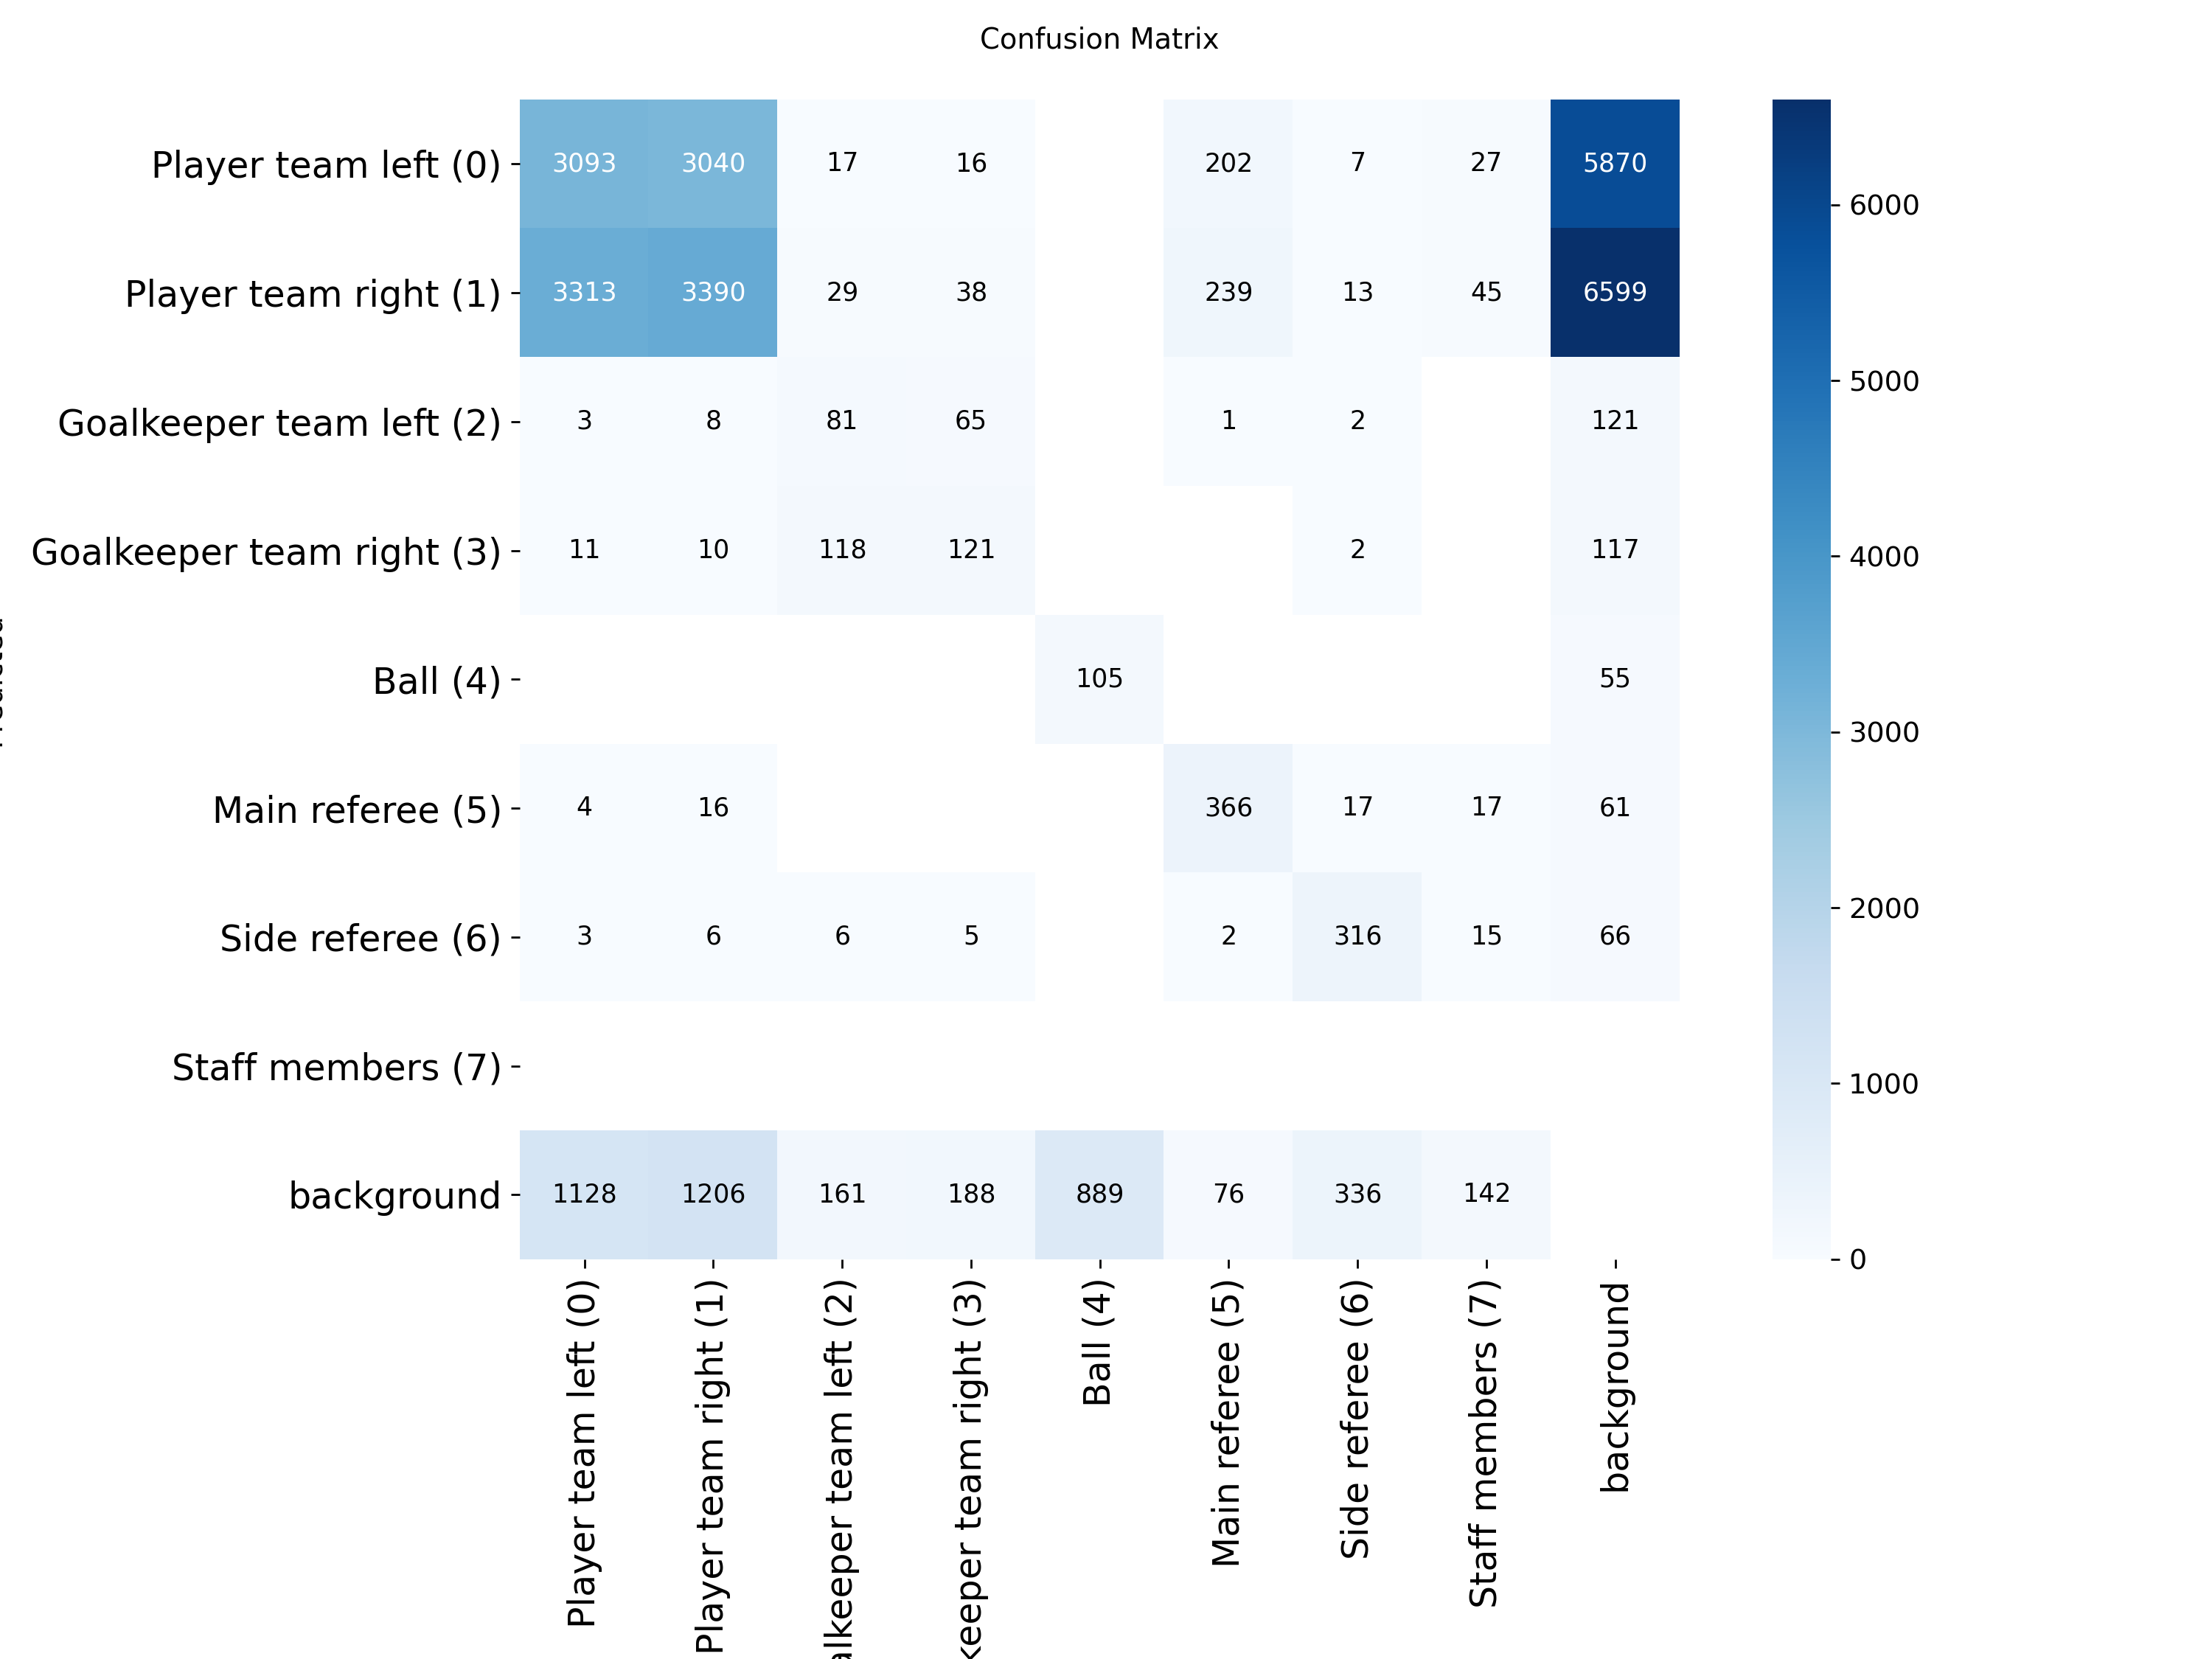

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x13d7abf40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
# Step 2: Evaluate + Confusion Matrix
evaluate_model()

In [ ]:
# Step 3: Predict image
predict_image("Data/Soccernet_yolo/test/images/171.png")


image 1/1 /Users/sandalisingh/Documents/SheInnovates/Data/Soccernet_yolo/test/images/171.png: 384x640 8 Player team left (0)s, 11 Player team right (1)s, 1 Ball (4), 37.3ms
Speed: 1.5ms preprocess, 37.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /Users/sandalisingh/Documents/SheInnovates/runs/detect/predict
Image prediction completed.


In [ ]:
# Step 4: Predict video
predict_video("Data/Bundesliga_Videos/0a2d9b_8.mp4")


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /Users/sandalisingh/Documents/SheInnovates/Data/Bundesliga_Videos/0a2d9b_8.mp4: 384x640 2 Player team left (0)s, 6 Player team right (1)s, 43.5ms
video 1/1 (frame 2/750) /Users/sandalisingh/Documents/SheInnovates/Data/Bundesliga_Videos/0a2d9b_8.mp4: 384x640 2 Player team left (0)s, 6 Player team right (1)s, 43.5ms
video 1/1 (frame 3/750) /Users/sandalisingh/Documents/SheInnovates/Data/Bundesliga_Videos/0a2d9b_8.mp4: 384x640 1 Play